In [14]:
import urllib.request
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [15]:
data_url = "ftp://aftp.cmdl.noaa.gov/products/trends/co2/co2_mm_mlo.txt"
data_file = '../../data_external/CO2_levels'

In [16]:
import shutil
if not os.path.isdir('../../data_external/'):
  os.mkdir('../../data_external/')
A= urllib.request.urlopen(data_url)
B = open(data_file, 'wb')
shutil.copyfileobj(A, B)
B.close()

In [17]:
data = np.genfromtxt(data_file, skip_header=72,names=("year", "month", "date","average"))
data['average'] = np.ma.masked_invalid(data['average'])
columns = ['year', 'month', 'date', 'average']
# Create a pandas DataFrame from the masked data
data_frame = pd.DataFrame(data)
# Display the DataFrame
data_frame

,year,month,date,average
0,1960.0,9.0,1960.7077,314.17
1,1960.0,10.0,1960.7896,313.83
2,1960.0,11.0,1960.8743,315.00
3,1960.0,12.0,1960.9563,316.19
4,1961.0,1.0,1961.0411,316.89
...,...,...,...,...
753,2023.0,6.0,2023.4583,423.68
754,2023.0,7.0,2023.5417,421.83
755,2023.0,8.0,2023.6250,419.68
756,2023.0,9.0,2023.7083,418.51


In [18]:
def quadratic_function(x, a, b, c):
    return a * x**2 + b * x + c

In [19]:
# Perform the quadratic curve fit
x = np.arange(len(data_frame))
y = data_frame['average']
popt, _ =curve_fit(quadratic_function, x, y)

# Extract the coefficients of the quadratic fit
a, b, c = popt

In [20]:
# Calculate the rate of change
r = 2 * a * x[-1] + b

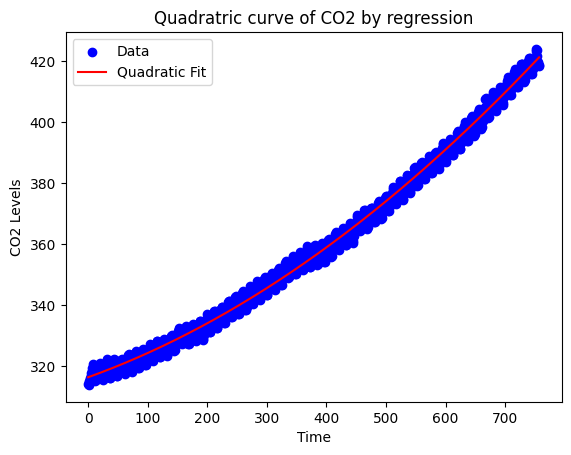

In [21]:
plt.figure()
plt.scatter(x, y, label='Data', color='b')
plt.plot(x, quadratic_function(x, a, b, c), 'r', label='Quadratic Fit')
plt.title("Quadratric curve of CO2 by regression")
plt.xlabel("Time")
plt.ylabel("CO2 Levels")
plt.legend()
plt.show()

In [22]:
r

0.20660316248980842

In [24]:
if r > 0:
    print("YES! The rate of increase of CO2 is increasing.")
else:
    print("The rate of increase of CO2 is not increasing.")

YES! The rate of increase of CO2 is increasing.
